In [3]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('autosavetime/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [ ]:
%matplotlib inline

### Baseline

In [1]:
# BASELINE = SOTA
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256

[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True), RandTransform(tfm=TfmPixel (blender), kwargs={'size': 0.1, 'alpha': 0.1, 'blend': None, 'grid': 1, 'same': 1}, p=1.0, resolved={'size': 0.1, 'alpha': 0.1, 'blend': None, 'grid': 1, 'same': 1}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 0; sym: 0


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.051718,2.070607,0.290000,0.778000,01:49
1,1.981451,1.957857,0.342000,0.820000,01:36
2,1.873038,2.285923,0.316000,0.776000,01:36
3,1.785332,2.088116,0.360000,0.822000,01:37
4,1.718979,2.050547,0.326000,0.842000,01:37
5,1.629522,1.978088,0.402000,0.892000,01:36
6,1.515179,1.687739,0.496000,0.908000,01:36
7,1.401669,1.446462,0.548000,0.958000,01:36
8,1.343932,2.240541,0.434000,0.874000,01:36
9,1.258222,1.352945,0.652000,0.962000,01:37


### BL + gridzero

In [ ]:
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --blalpha .2 --bltype 'zero' --blgrid 1 --blsame 1

### BL + gridcut

[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True), RandTransform(tfm=TfmPixel (blender), kwargs={'size': 0.05, 'alpha': 0.2, 'blend': 'cut', 'grid': 1, 'same': 1}, p=1.0, resolved={'size': 0.05, 'alpha': 0.2, 'blend': 'cut', 'grid': 1, 'same': 1}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 0; sym: 0


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.069787,2.070110,0.298000,0.750000,01:37
1,2.004929,2.059004,0.306000,0.786000,01:37
2,1.941726,1.928453,0.372000,0.820000,01:37
3,1.878688,2.031428,0.346000,0.838000,01:37
4,1.774392,1.718435,0.458000,0.896000,01:37
5,1.687473,1.664009,0.520000,0.908000,01:37
6,1.615368,1.738590,0.484000,0.922000,01:38
7,1.533349,2.501976,0.412000,0.916000,01:37
8,1.431804,1.709657,0.548000,0.930000,01:37
9,1.358737,1.607899,0.538000,0.962000,01:37


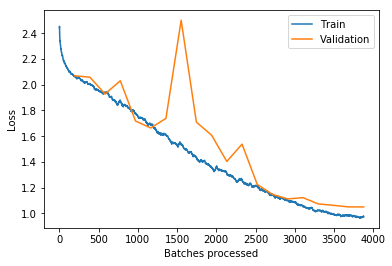

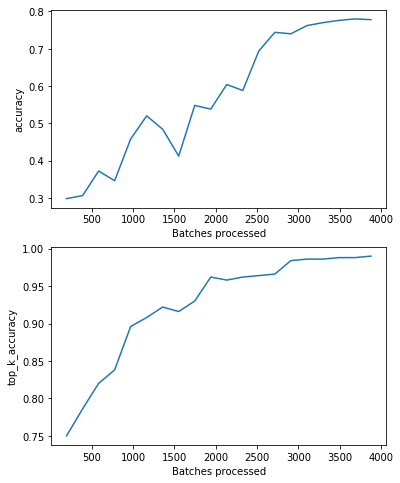

In [3]:
# BL + GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --blalpha .2 --bltype 'cut' --blgrid 1 --blsame 1

### BL + gridmix

[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True), RandTransform(tfm=TfmPixel (blender), kwargs={'size': 0.05, 'alpha': 0.2, 'blend': 'mix', 'grid': 1, 'same': 1}, p=1.0, resolved={'size': 0.05, 'alpha': 0.2, 'blend': 'mix', 'grid': 1, 'same': 1}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 0; sym: 0


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.084026,2.118919,0.276000,0.754000,01:36
1,2.032479,2.083799,0.312000,0.774000,01:35
2,1.966076,2.067285,0.330000,0.798000,01:35
3,1.877283,2.493160,0.290000,0.816000,01:36
4,1.802372,2.374757,0.328000,0.796000,01:36
5,1.699378,1.756229,0.436000,0.906000,01:35
6,1.578295,1.771974,0.456000,0.930000,01:36
7,1.496766,1.871033,0.460000,0.898000,01:36
8,1.435970,1.546975,0.538000,0.922000,01:36
9,1.340736,1.592003,0.572000,0.924000,01:36


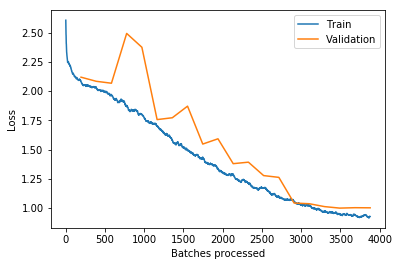

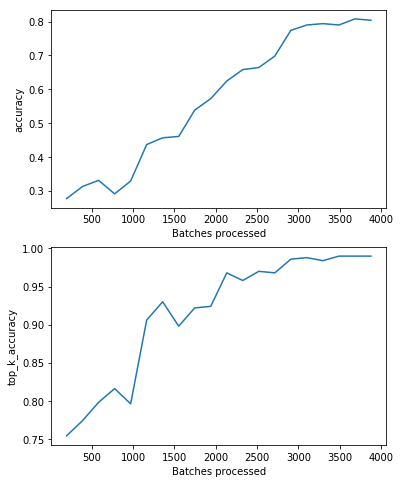

In [2]:
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --blalpha .2 --bltype 'mix' --blgrid 1 --blsame 1

### (wrong) BL + progressive gridmix

In [1]:
# BL + GRIDMIX + SCHEDULED (BL)
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'mix' --blgrid 1 --blsame 1 --tfm_sch 1 

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 0; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blender), size=0.05, alpha=0.2, blend='mix', grid=1, same=1, proba=0), sch_param='alpha', sch_vals=(0, 0.5), sch_iters=0.1, func=<function annealing_cos at 0x7fe2858256a8>, plot=1)
to_fp16: True


<Figure size 640x480 with 1 Axes>

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.062382,2.080224,0.292000,0.760000,02:55
1,2.005717,2.069068,0.312000,0.786000,02:47
2,1.914272,1.966529,0.370000,0.814000,02:47
3,1.840109,2.007843,0.380000,0.810000,02:47
4,1.741780,2.049037,0.370000,0.840000,02:47
5,1.659815,2.018296,0.380000,0.828000,02:48
6,1.575430,1.847781,0.430000,0.878000,02:47
7,1.475800,1.700258,0.506000,0.924000,02:47
8,1.394107,1.616597,0.516000,0.922000,02:47
9,1.347432,1.872812,0.436000,0.872000,02:48


### BL + progressive gridmix

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 0; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blender), size=0.05, alpha=0.1, blend='mix', grid=1, same=1, proba=0), sch_param='alpha', sch_val=(0, 0.2), sch_iter=(0.0, 0.5), sch_func=<function annealing_cos at 0x7f2c014c16a8>, plot=1)
to_fp16: True

 alpha between 0.0 and 0.2 in iters 0.00 to 0.50


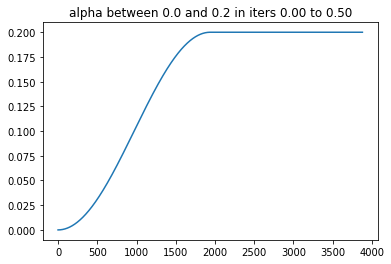

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.041186,2.093366,0.290000,0.766000,02:45
1,1.945994,1.992960,0.356000,0.794000,02:45
2,1.847133,2.199868,0.352000,0.786000,02:45
3,1.761386,1.764797,0.472000,0.908000,02:45
4,1.700779,1.829500,0.424000,0.888000,02:45
5,1.603903,2.011513,0.412000,0.856000,02:44
6,1.531518,1.670368,0.462000,0.940000,02:45
7,1.420703,1.638630,0.486000,0.912000,02:45
8,1.313952,1.751070,0.510000,0.938000,02:45
9,1.269838,1.619157,0.600000,0.930000,02:45


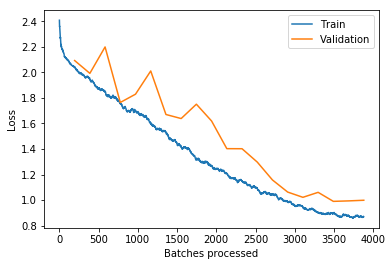

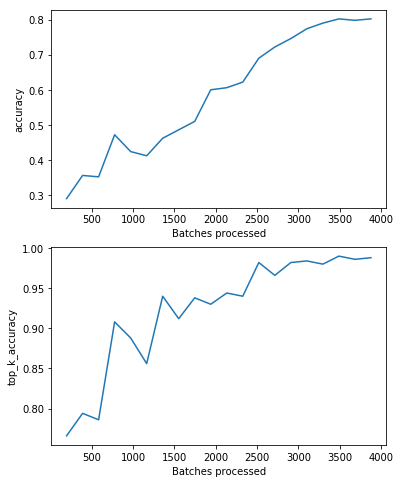

In [5]:
# BL + GRIDMIX + SCHEDULED (BL)
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'mix' --blgrid 1 --blsame 1 --tfm_sch 1 --sch_val_max .2 --sch_iter_max .5

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True), RandTransform(tfm=TfmPixel (blender), kwargs={'size': 0.05, 'alpha': 0.2, 'blend': 'mix', 'grid': 1, 'same': 1, 'proba': 1}, p=1.0, resolved={'size': 0.05, 'alpha': 0.2, 'blend': 'mix', 'grid': 1, 'same': 1, 'proba': 1}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 0; sym: 0
to_fp16: True


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.078513,2.142968,0.280000,0.760000,02:43
1,2.018493,2.095046,0.300000,0.800000,02:43
2,1.926885,2.258157,0.284000,0.808000,02:43
3,1.853759,1.764932,0.426000,0.888000,02:43
4,1.753893,2.437279,0.360000,0.854000,02:43
5,1.652548,2.140627,0.442000,0.878000,02:43
6,1.558163,1.611108,0.514000,0.930000,02:43
7,1.457309,1.568686,0.548000,0.940000,02:43
8,1.401446,1.536291,0.548000,0.932000,02:43
9,1.325690,1.328145,0.642000,0.968000,02:43


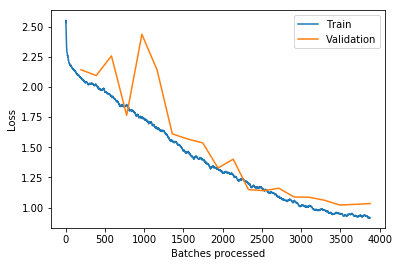

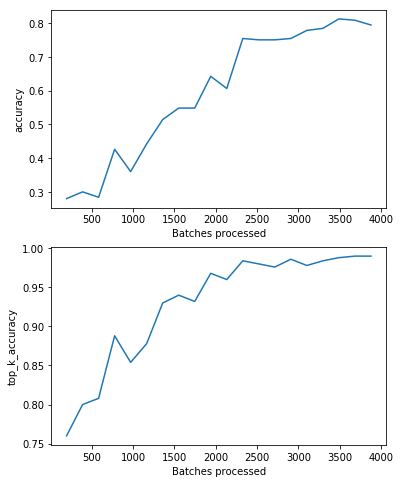

In [7]:
# BL + GRIDMIX PROBA
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --blalpha .2 --blproba 1 --bltype 'mix' --blgrid 1 --blsame 1

### sa

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
to_fp16: True


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.044513,2.098840,0.308000,0.766000,03:06
1,1.957307,1.998287,0.348000,0.826000,03:05
2,1.853849,1.934040,0.370000,0.848000,03:05
3,1.692713,1.840852,0.438000,0.870000,03:05
4,1.604834,1.784187,0.446000,0.908000,03:05
5,1.504817,2.308488,0.422000,0.816000,03:05
6,1.409401,1.540058,0.528000,0.940000,03:05
7,1.314970,1.392493,0.648000,0.956000,03:05
8,1.257261,1.318568,0.664000,0.960000,03:05
9,1.175770,1.293085,0.672000,0.966000,03:05


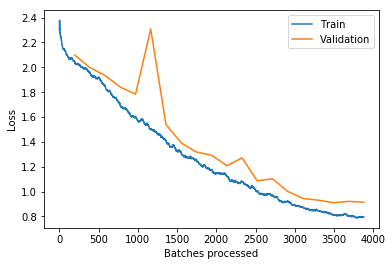

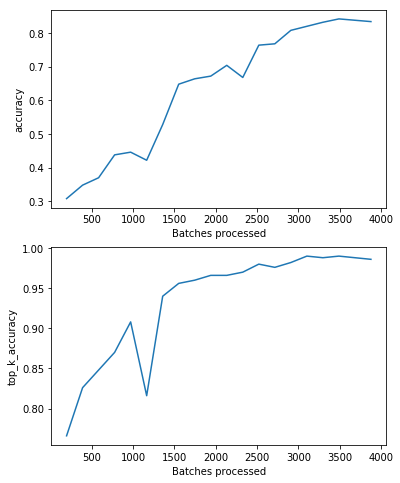

In [6]:
# BASELINE + SA
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1

### sa + gridcut .25 gauss + dynamic (0, .75)

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='cut', grid=1, same=1, proba=1), sch_param='alpha', sch_val=(0, 0.25), sch_iter=(0.0, 0.75), sch_func=<function annealing_cos at 0x7f6c3d9db730>, plot=1, test=0)
to_fp16: True

 alpha between 0.0 and 0.25 in iters 0.00 to 0.75


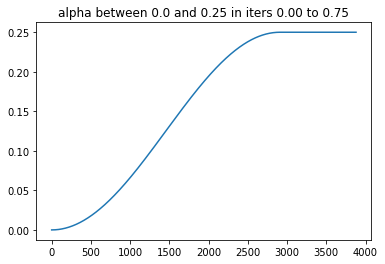

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.044380,2.061413,0.304000,0.788000,03:06
1,1.963028,2.030063,0.292000,0.812000,03:05
2,1.855145,2.025832,0.336000,0.850000,03:06
3,1.737579,1.790215,0.414000,0.886000,03:05
4,1.627824,1.712635,0.478000,0.930000,03:06
5,1.492454,1.744044,0.512000,0.922000,03:06
6,1.405918,1.555323,0.552000,0.914000,03:06
7,1.342234,1.348516,0.636000,0.958000,03:06
8,1.284340,1.390883,0.640000,0.950000,03:06
9,1.221478,1.424969,0.624000,0.960000,03:06


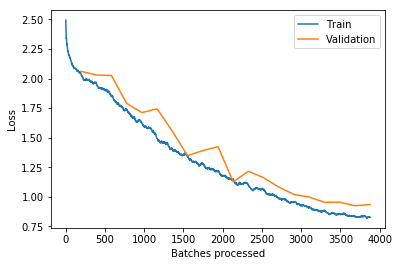

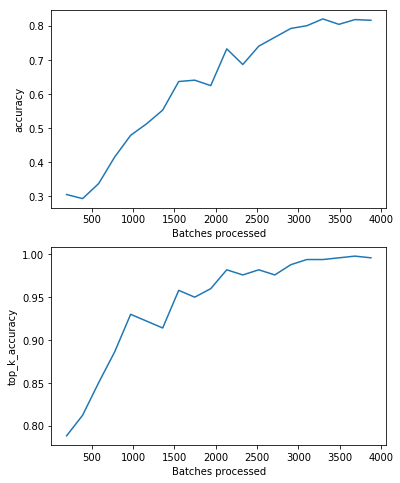

In [2]:
# BL + GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --blproba 1 --bltype 'cut' --blgrid 1 --blsame 1  --sa 1 --tfm_sch 1 --sch_val_max .25 --sch_iter_max .75 --sch_test 0

### sa + gridcut .25 gauss + dynamic (.3, 1.)

In [1]:
# BL + GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --blproba 1 --bltype 'cut' --blgrid 1 --blsame 1  --sa 1 --tfm_sch 1 --sch_val_max .25 --sch_iter_min .3 --sch_test 0

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='cut', grid=1, same=1, proba=1), sch_param='alpha', sch_val=(0.0, 0.25), sch_iter=(0.3, 1.0), sch_func=<function annealing_cos at 0x7f5b892a4730>, plot=1, test=0)
to_fp16: True
self.end_iter: 3880

 alpha between 0.0 and 0.25 in iters 0.30 to 1.00


<Figure size 640x480 with 1 Axes>

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.044356,2.090284,0.284000,0.784000,03:14
1,1.968799,2.093584,0.298000,0.784000,03:05
2,1.860600,2.085542,0.354000,0.838000,03:06
3,1.724977,2.184387,0.364000,0.880000,03:05
4,1.637550,1.753031,0.440000,0.906000,03:05
5,1.535367,1.661621,0.516000,0.906000,03:06
6,1.434706,1.881358,0.468000,0.918000,03:22
7,1.337800,1.474757,0.556000,0.950000,03:22
8,1.270613,1.386233,0.584000,0.974000,03:06
9,1.205427,1.345165,0.644000,0.972000,03:06


### sa + gridcut uniform

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='cut', grid=1, same=1, proba=0), sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.0, 1.0), sch_func=<function annealing_cos at 0x7fdbb6e9d730>, plot=1, test=0)
to_fp16: True
self.end_iter: 3880

 alpha between 0.0 and 1.0 in iters 0.00 to 1.00


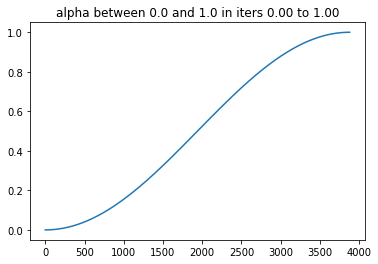

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.050898,2.117803,0.254000,0.780000,03:07
1,1.952399,2.022543,0.326000,0.810000,03:06
2,1.887946,2.218681,0.316000,0.804000,03:07
3,1.762791,2.104285,0.362000,0.834000,03:07
4,1.700772,2.048493,0.348000,0.912000,03:06
5,1.606696,1.607484,0.504000,0.918000,03:06
6,1.508840,1.756179,0.494000,0.904000,03:07
7,1.470615,1.578723,0.546000,0.922000,03:07
8,1.408296,1.818144,0.518000,0.950000,03:07
9,1.340875,1.399589,0.630000,0.960000,03:07


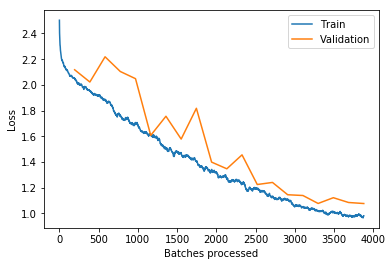

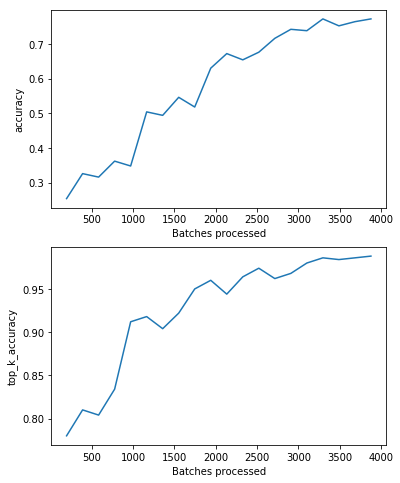

In [9]:
# BL + GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'cut' --blgrid 1 --blsame 1  --sa 1  --tfm_sch 1 --sch_val_max 1. --sch_test 0

In [ ]:
# BL + GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'cut' --blgrid 1 --blsame 1  --sa 1 --tfm_sch 1 --sch_test 1

## Partial

### BASELINE

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
to_fp16: True


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.312336,2.302470,0.156250,0.531250,00:12
1,2.172560,2.328367,0.093750,0.593750,00:10
2,2.102816,2.192660,0.312500,0.750000,00:10
3,2.044296,2.504689,0.312500,0.625000,00:10
4,2.006902,2.623525,0.218750,0.656250,00:10
5,1.979340,2.468012,0.156250,0.687500,00:10
6,1.933408,2.613161,0.187500,0.687500,00:10
7,1.904645,2.664811,0.281250,0.718750,00:10
8,1.868731,2.386293,0.156250,0.718750,00:10
9,1.820528,2.530556,0.218750,0.625000,00:10


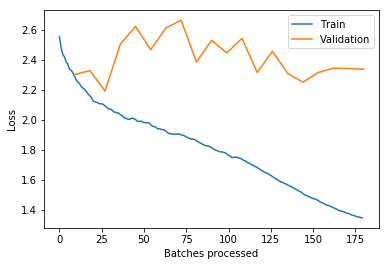

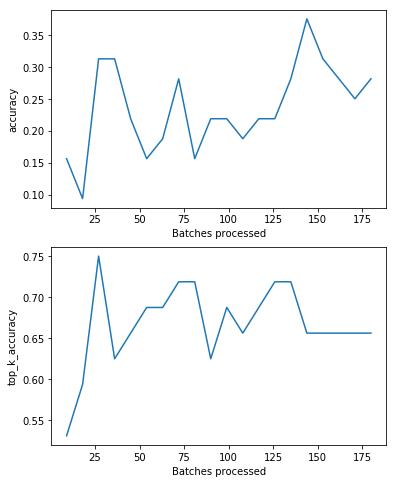

In [3]:
# BASELINE + SA
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --use_partial .05

In [1]:
# GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'cut' --blgrid 1 --blsame 1  --sa 1  --tfm_sch 1 --sch_val_max 1. --sch_test 0 --use_partial .05

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='cut', grid=1, same=1, proba=0), sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.0, 1.0), sch_func=<function annealing_cos at 0x7f8ef02a2730>, plot=1, test=0)
to_fp16: True
self.end_iter: 180

 alpha between 0.0 and 1.0 in iters 0.00 to 1.00


<Figure size 640x480 with 1 Axes>

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.301685,2.355892,0.176471,0.529412,00:18
1,2.184972,2.267722,0.205882,0.647059,00:09
2,2.107673,2.272527,0.205882,0.676471,00:09
3,2.054386,2.435781,0.235294,0.676471,00:09
4,2.043159,2.437778,0.235294,0.676471,00:10
5,2.036513,2.720185,0.147059,0.470588,00:10
6,2.026519,2.566185,0.205882,0.676471,00:12
7,2.018938,2.625073,0.235294,0.647059,00:14
8,1.997434,2.219803,0.294118,0.676471,00:13
9,1.950775,2.362854,0.235294,0.617647,00:14


n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='mix', grid=1, same=1, proba=0), sch_param='alpha', sch_val=(0.0, 0.3), sch_iter=(0.0, 1.0), sch_func=<function annealing_cos at 0x7f8ef02a2730>, plot=1, test=0)
to_fp16: True
self.end_iter: 180

 alpha between 0.0 and 0.3 in iters 0.00 to 1.00


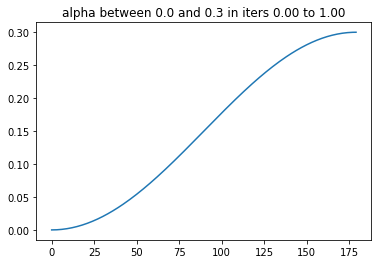

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.306799,2.225469,0.208333,0.750000,00:11
1,2.175720,2.111301,0.208333,0.666667,00:10
2,2.106851,2.120551,0.291667,0.666667,00:09
3,2.060703,2.339789,0.166667,0.666667,00:09
4,2.026096,2.364851,0.166667,0.666667,00:09
5,2.012347,2.575235,0.291667,0.666667,00:09
6,1.994735,2.524295,0.166667,0.541667,00:09
7,1.967654,2.645254,0.083333,0.708333,00:10
8,1.937514,2.413919,0.208333,0.666667,00:11
9,1.895640,2.318806,0.208333,0.708333,00:13


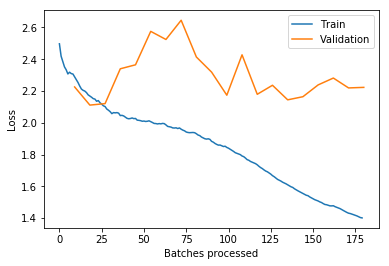

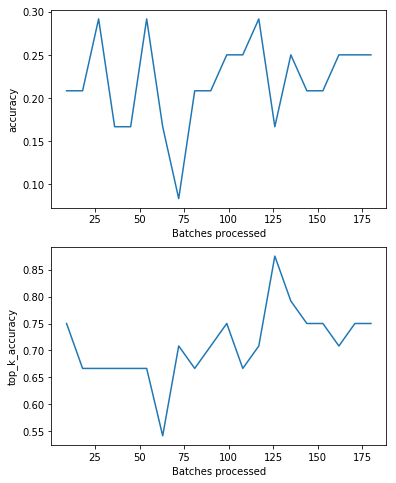

In [3]:
# GRIDMIX
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'mix' --blgrid 1 --blsame 1  --sa 1  --tfm_sch 1 --sch_val_max .3 --sch_test 0 --use_partial .05

In [1]:
# GRIDZERO
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'zero' --blgrid 1 --blsame 1  --sa 1  --tfm_sch 1 --sch_val_max 1. --sch_test 0 --use_partial .05

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='zero', grid=1, same=1, proba=0), sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.0, 1.0), sch_func=<function annealing_cos at 0x7fdbb6e9d730>, plot=1, test=0)
to_fp16: True
self.end_iter: 180

 alpha between 0.0 and 1.0 in iters 0.00 to 1.00


<Figure size 640x480 with 1 Axes>

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.331557,2.379567,0.068966,0.482759,00:19
1,2.197908,2.302469,0.137931,0.689655,00:09
2,2.112901,2.470478,0.172414,0.655172,00:09
3,2.066452,2.770144,0.137931,0.655172,00:10
4,2.045247,2.699099,0.137931,0.586207,00:09
5,2.040087,2.776145,0.172414,0.551724,00:09
6,2.008466,3.196396,0.103448,0.724138,00:10
7,1.981234,2.830206,0.172414,0.689655,00:10
8,1.945733,2.474900,0.103448,0.758621,00:09
9,1.919555,2.485026,0.172414,0.793103,00:10


n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='noise', grid=1, same=1, proba=0), sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.0, 1.0), sch_func=<function annealing_cos at 0x7fdbb6e9d730>, plot=1, test=0)
to_fp16: True
self.end_iter: 180

 alpha between 0.0 and 1.0 in iters 0.00 to 1.00


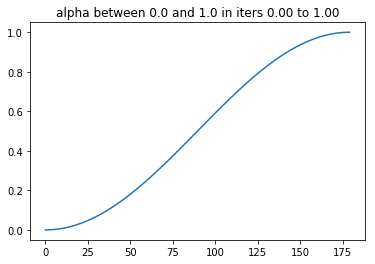

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.369931,2.324691,0.038462,0.576923,00:11
1,2.223146,2.256081,0.076923,0.653846,00:09
2,2.142539,2.419459,0.038462,0.538462,00:09
3,2.083346,2.732003,0.076923,0.500000,00:10
4,2.054922,3.352955,0.076923,0.384615,00:09
5,2.052731,3.305962,0.115385,0.615385,00:10
6,2.037360,2.805291,0.192308,0.576923,00:10
7,2.026843,3.446891,0.115385,0.538462,00:09
8,1.983811,2.789000,0.076923,0.653846,00:10
9,1.950123,3.224751,0.038462,0.500000,00:09


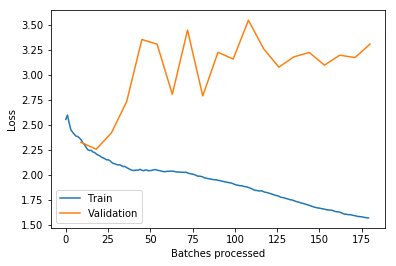

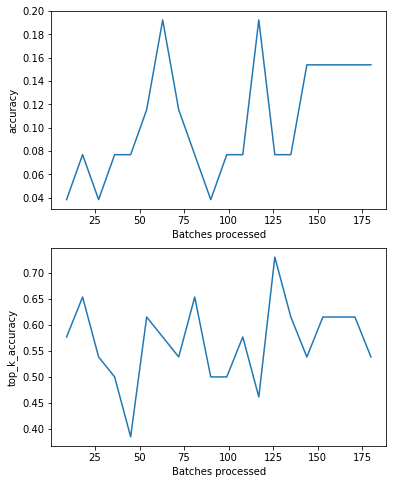

In [2]:
# NOISE
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'noise' --blgrid 1 --blsame 1  --sa 1  --tfm_sch 1 --sch_val_max 1. --sch_test 0 --use_partial .05

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='noise', grid=1, same=1, proba=0), sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.0, 1.0), sch_func=<function annealing_cos at 0x7fdbb6e9d730>, plot=1, test=0)
to_fp16: True
self.end_iter: 180

 alpha between 0.0 and 1.0 in iters 0.00 to 1.00


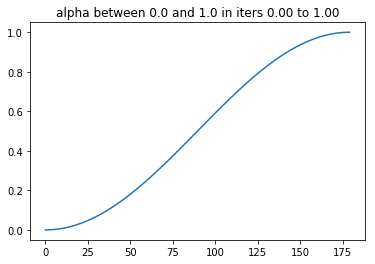

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.358763,2.237321,0.130435,0.608696,00:11
1,2.184531,2.054238,0.217391,0.695652,00:09
2,2.115787,2.038649,0.260870,0.826087,00:09
3,2.053043,2.105139,0.260870,0.782609,00:09
4,2.017552,2.429060,0.217391,0.739130,00:10
5,2.004934,2.497003,0.260870,0.695652,00:09
6,2.002166,2.972820,0.217391,0.521739,00:09
7,1.993526,2.755772,0.173913,0.739130,00:10
8,1.956063,2.768934,0.086957,0.695652,00:10
9,1.910486,2.353525,0.130435,0.826087,00:10


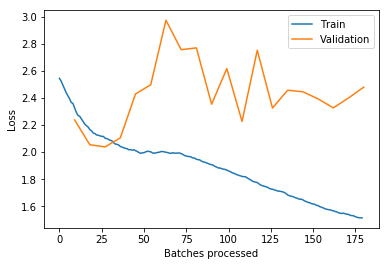

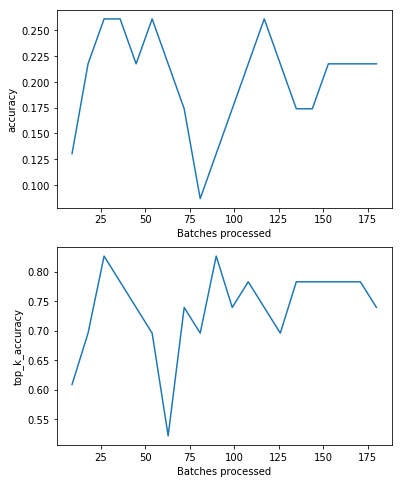

In [3]:
# NOISE
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'noise' --blgrid 1 --blsame 1  --sa 1  --tfm_sch 1 --sch_val_max 1. --sch_test 0 --use_partial .05

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmPixel (blend), kwargs={'size': 0.05, 'alpha': 1.0, 'blend': 'cut', 'grid': 1, 'same': 1, 'proba': 0}, p=1.0, resolved={'size': 0.05, 'alpha': 1.0, 'blend': 'cut', 'grid': 1, 'same': 1, 'proba': 0}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
to_fp16: True


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.363430,2.313625,0.166667,0.633333,00:11
1,2.246415,2.310761,0.200000,0.600000,00:10
2,2.185526,2.263024,0.133333,0.666667,00:10
3,2.159551,2.452464,0.266667,0.700000,00:10
4,2.136276,2.727589,0.166667,0.666667,00:10
5,2.126800,2.631964,0.066667,0.766667,00:10
6,2.124606,3.112702,0.200000,0.666667,00:10
7,2.107961,2.533775,0.200000,0.666667,00:10
8,2.076623,2.627371,0.233333,0.666667,00:10
9,2.048603,2.559526,0.233333,0.700000,00:10


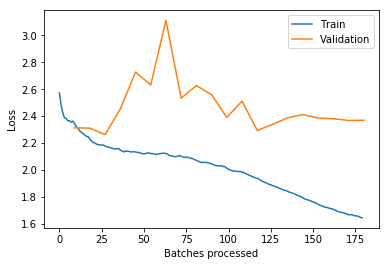

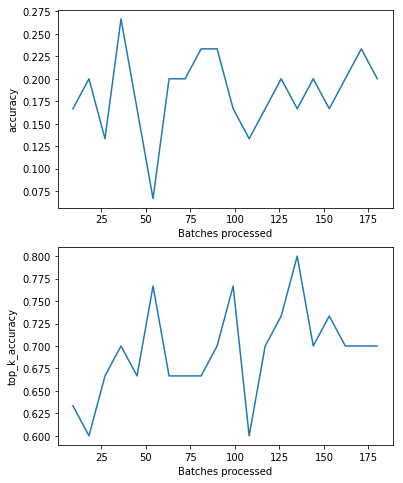

In [6]:
# GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --blalpha 1. --bltype 'cut' --blgrid 1 --blsame 1  --sa 1 --use_partial .05

In [ ]:
# GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --blalpha .25 --bltype 'cut' --blgrid 1 --blsame 1  --sa 1 --use_partial .05

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='cut', grid=1, same=1, proba=1), sch_param='alpha', sch_val=(0.0, 0.25), sch_iter=(0.0, 1.0), sch_func=<function annealing_cos at 0x7fdbb6e9d730>, plot=1, test=0)
to_fp16: True
self.end_iter: 180

 alpha between 0.0 and 0.25 in iters 0.00 to 1.00


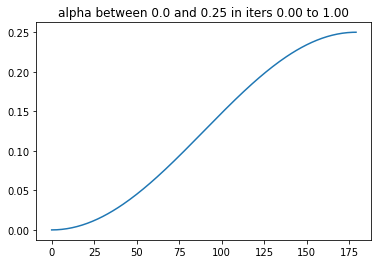

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.364398,2.242943,0.043478,0.695652,00:09
1,2.214912,2.388954,0.217391,0.565217,00:09
2,2.138113,2.346275,0.260870,0.478261,00:09
3,2.084483,2.339013,0.260870,0.652174,00:10
4,2.041033,2.514424,0.173913,0.652174,00:10
5,2.008142,2.392579,0.304348,0.608696,00:09
6,1.977647,2.683737,0.347826,0.478261,00:10
7,1.944069,2.377813,0.130435,0.695652,00:10
8,1.909216,2.149647,0.304348,0.695652,00:10
9,1.871024,2.579611,0.173913,0.652174,00:10


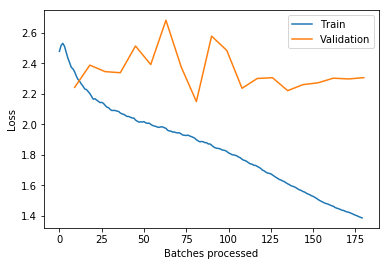

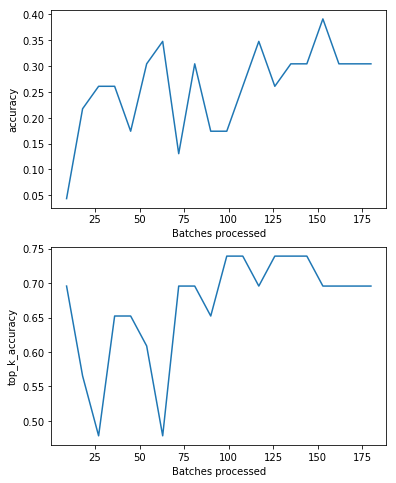

In [5]:
# GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'cut' --blgrid 1 --blsame 1 --blproba 1 --sa 1  --tfm_sch 1 --sch_val_max .25 --sch_test 0 --use_partial .05

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(TfmPixel (blend), size=0.05, alpha=0.1, blend='cut', grid=1, same=1, proba=0), sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.0, 1.0), sch_func=<function annealing_cos at 0x7fdbb6e9d730>, plot=1, test=0)
to_fp16: True
self.end_iter: 180

 alpha between 0.0 and 1.0 in iters 0.00 to 1.00


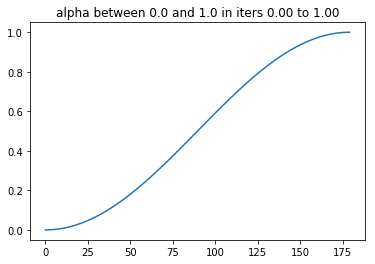

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.277032,2.184541,0.208333,0.750000,00:09
1,2.153924,2.147453,0.291667,0.625000,00:09
2,2.091927,2.244991,0.291667,0.625000,00:10
3,2.045199,2.517491,0.208333,0.625000,00:10
4,2.020269,2.711793,0.125000,0.708333,00:10
5,2.017838,2.923670,0.166667,0.541667,00:10
6,2.014629,2.814410,0.250000,0.541667,00:10
7,1.998422,2.626215,0.125000,0.708333,00:10
8,1.981930,2.329195,0.250000,0.750000,00:10
9,1.955441,2.443162,0.250000,0.625000,00:10


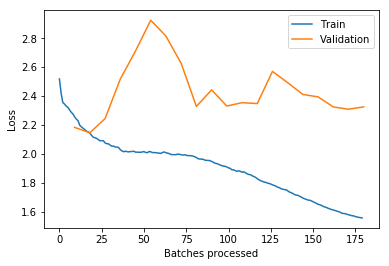

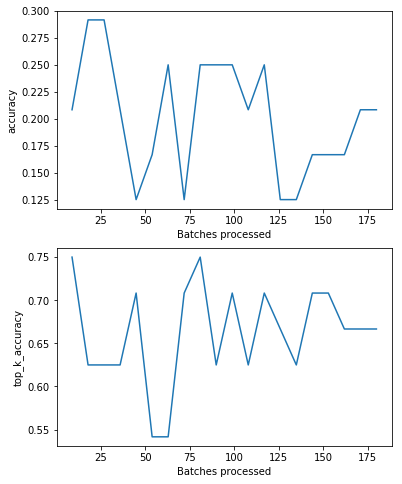

In [7]:
# GRIDCUT
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --blsize .05 --bltype 'cut' --blgrid 1 --blsame 1  --sa 1  --tfm_sch 1 --sch_val_max 1. --sch_test 0 --use_partial .05

## Full set

In [1]:
# BASELINE + SA + cutmix
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --cutmix 1.

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
cutmix: 1.0
to_fp16: True


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.130426,2.095068,0.286000,0.754000,03:15
1,2.122096,2.036767,0.306000,0.798000,03:06
2,2.061254,2.160226,0.294000,0.782000,03:06
3,1.976700,1.823716,0.414000,0.840000,03:06
4,1.926194,1.842267,0.396000,0.884000,03:06
5,1.886958,1.727547,0.468000,0.892000,03:06
6,1.810187,1.646732,0.500000,0.910000,03:06
7,1.761405,1.646958,0.540000,0.912000,03:06
8,1.699178,1.473556,0.578000,0.934000,03:07
9,1.598078,1.327139,0.634000,0.962000,03:06


n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=<function cutmix at 0x7fc214d8fb70>, sch_param='alpha', sch_val=1.0, sch_iter=None, sch_func=<function annealing_cos at 0x7fc2254cbea0>, plot=True, test=False)
to_fp16: True

 alpha between 0.0 and 1.0 in iters 0.00 to 1.00


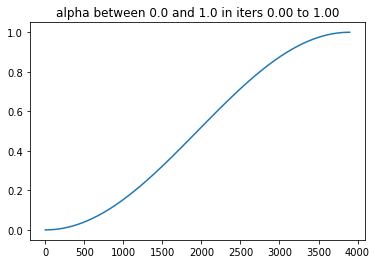

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.066762,2.146505,0.260000,0.754000,01:59
1,1.968135,2.042532,0.306000,0.798000,01:43
2,1.919592,1.925092,0.388000,0.832000,01:43
3,1.821454,1.953795,0.386000,0.850000,01:43
4,1.712203,1.715270,0.480000,0.886000,01:44
5,1.660732,1.561308,0.550000,0.910000,01:43
6,1.638883,1.538395,0.534000,0.920000,01:44
7,1.612330,1.398525,0.594000,0.942000,01:43
8,1.565365,1.371527,0.612000,0.962000,01:44
9,1.538158,1.473942,0.596000,0.948000,01:43


In [1]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --tfm_sch 1

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=<function cutmix at 0x7fc214d8fb70>, sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.3, 1.0), sch_func=<function annealing_cos at 0x7fc2254cbea0>, plot=1, test=0)
to_fp16: True

 alpha between 0.0 and 1.0 in iters 0.30 to 1.00


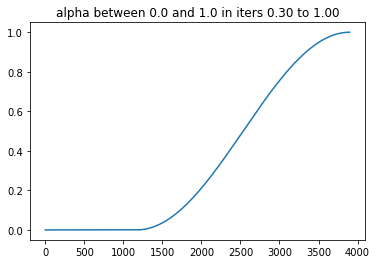

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.053411,2.096252,0.288000,0.762000,01:43
1,1.978849,2.032866,0.320000,0.818000,01:43
2,1.865337,2.007347,0.342000,0.864000,01:43
3,1.733105,1.959876,0.360000,0.892000,01:43
4,1.627333,2.038165,0.430000,0.834000,01:43
5,1.544750,1.553445,0.536000,0.920000,01:43
6,1.443258,2.022171,0.454000,0.906000,01:43
7,1.395796,1.832979,0.470000,0.892000,01:44
8,1.339851,1.411264,0.636000,0.944000,01:43
9,1.331945,1.391971,0.644000,0.952000,01:44


In [4]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --tfm_sch 1 --sch_val_max 1 --sch_iter_min .3  --sch_iter_max 1.

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=<function cutmix at 0x7f290017fbf8>, sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.0, 1.0), sch_func=<function cosine_annealing at 0x7f29001942f0>, plot=1, test=0)
to_fp16: True

 alpha between 0.0 and 1.0 in iters 0.00 to 1.00


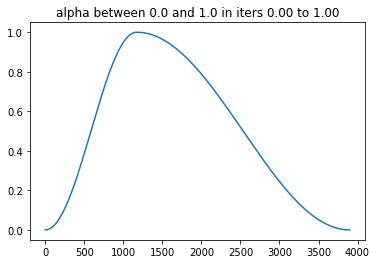

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.062566,2.069422,0.330000,0.760000,01:51
1,2.008154,2.058686,0.336000,0.792000,01:44
2,1.991611,2.071878,0.318000,0.832000,01:44
3,1.966011,2.113585,0.366000,0.838000,01:44
4,1.939508,3.457653,0.212000,0.796000,01:44
5,1.854818,1.779660,0.418000,0.886000,01:43
6,1.800351,3.310969,0.234000,0.790000,01:44
7,1.741617,1.819189,0.446000,0.898000,01:44
8,1.649169,1.469297,0.594000,0.900000,01:44
9,1.646782,1.454530,0.560000,0.938000,01:45


In [1]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --tfm_sch 1 --sch_val_max 1 --sch_func 'bicos'

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=<function cutmix at 0x7f290017fbf8>, sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.3, 0.8), sch_func=<function annealing_cos at 0x7f290b6b8f28>, plot=1, test=0)
to_fp16: True

 alpha between 0.0 and 1.0 in iters 0.30 to 0.80


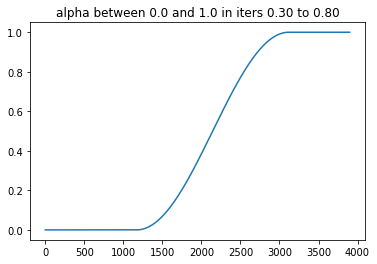

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.054263,2.080384,0.322000,0.770000,01:44
1,1.988517,2.081022,0.288000,0.774000,01:44
2,1.856244,2.043835,0.360000,0.818000,01:44
3,1.735433,1.903510,0.364000,0.864000,01:44
4,1.611654,1.868427,0.390000,0.876000,01:43
5,1.516560,1.892075,0.420000,0.870000,01:44
6,1.429533,1.784447,0.450000,0.930000,01:44
7,1.392360,1.837096,0.442000,0.912000,01:44
8,1.415618,1.526936,0.606000,0.930000,01:44
9,1.385689,1.528200,0.600000,0.956000,01:44


In [2]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --tfm_sch 1 --sch_val_max 1 --sch_iter_min .3  --sch_iter_max .8

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=<function cutmix at 0x7f290017fbf8>, sch_param='alpha', sch_val=(0.0, 1.0), sch_iter=(0.0, 0.8), sch_func=<function cosine_annealing at 0x7f29001942f0>, plot=1, test=0)
to_fp16: True

 alpha between 0.0 and 1.0 in iters 0.00 to 0.80


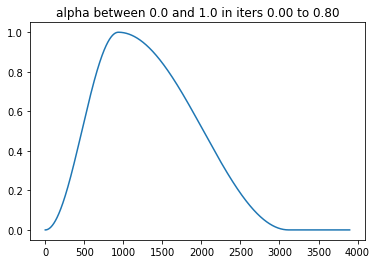

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.067375,2.092310,0.284000,0.754000,01:45
1,2.028894,2.033764,0.314000,0.802000,01:45
2,2.032547,1.930179,0.386000,0.826000,01:44
3,1.984145,2.006754,0.374000,0.842000,01:44
4,1.931763,2.044863,0.388000,0.866000,01:44
5,1.854594,1.942614,0.400000,0.870000,01:44
6,1.780868,1.534772,0.558000,0.922000,01:44
7,1.733408,1.679432,0.432000,0.930000,01:45
8,1.652819,1.351252,0.634000,0.954000,01:45
9,1.514962,1.340668,0.630000,0.952000,01:44


In [3]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --tfm_sch 1 --sch_val_max 1 --sch_iter_max .8 --sch_func 'bicos'

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=<function cutmix at 0x7f290017fbf8>, sch_param='alpha', sch_val=(0.0, 0.5), sch_iter=(0.0, 0.8), sch_func=<function annealing_cos at 0x7f290b6b8f28>, plot=1, test=0)
to_fp16: True

 alpha between 0.0 and 0.5 in iters 0.00 to 0.80


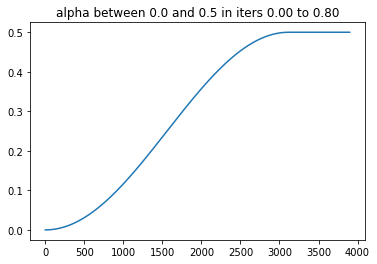

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.050246,2.096519,0.304000,0.756000,01:44
1,1.981429,2.056870,0.308000,0.780000,01:45
2,1.846380,2.004412,0.366000,0.852000,01:44
3,1.761796,2.206270,0.344000,0.868000,01:44
4,1.677383,2.122600,0.390000,0.834000,01:44
5,1.600300,2.007560,0.420000,0.910000,01:44
6,1.526202,2.091020,0.452000,0.900000,01:45
7,1.516969,1.488524,0.556000,0.948000,01:45
8,1.499382,1.443602,0.600000,0.956000,01:45
9,1.454169,1.343614,0.634000,0.938000,01:44


In [5]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --tfm_sch 1 --sch_val_max .5 --sch_iter_min .0  --sch_iter_max .8

In [ ]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --tfm_sch 1 --sch_val_max 1 --sch_iter_min .3 --sch_iter_max .8 --sch_func 'cos'

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
sch_cutmix: 1.0
functools.partial(<class 'exp.nb_new_data_augmentation.TfmScheduler'>, tfm_fn=functools.partial(<function cutmix at 0x7f290017fbf8>, alpha=1.0), sch_param='alpha', sch_val=(1.0, 0.0), sch_iter=(0.3, 0.5), sch_func=<function annealing_cos at 0x7f290b6b8f28>, plot=1, test=0)
to_fp16: True

 alpha between 0.0 and 1.0 in iters 0.30 to 0.50


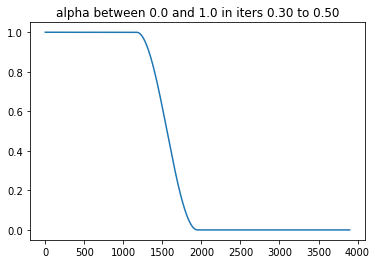

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.143901,2.122395,0.264000,0.760000,01:44
1,2.093595,2.037100,0.302000,0.800000,01:44
2,2.070761,1.997126,0.348000,0.794000,01:44
3,2.003160,2.210010,0.300000,0.782000,01:44
4,1.935617,1.995519,0.344000,0.854000,01:44
5,1.862193,1.784501,0.400000,0.880000,01:44
6,1.840221,1.786762,0.426000,0.910000,01:44
7,1.673816,1.699651,0.450000,0.920000,01:45
8,1.510266,1.673601,0.482000,0.946000,01:44
9,1.264854,1.360341,0.638000,0.946000,01:45


In [ ]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --cutmix 1. --tfm_sch 1 --sch_val_min 1. --sch_val_max 0. --sch_iter_min .3 --sch_iter_max .5 --sch_func 'cos'

In [18]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --mixup .3

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.01
sa: 1; sym: 0
mixup: 0.3
to_fp16: True


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.141596,2.091007,0.264000,0.766000,01:44
1,2.100299,2.026174,0.332000,0.808000,01:44
2,2.027739,2.080011,0.306000,0.806000,01:44
3,1.917786,2.316795,0.284000,0.812000,01:44
4,1.824925,2.127291,0.296000,0.816000,01:44
5,1.731209,2.038677,0.372000,0.832000,01:44
6,1.687754,1.658716,0.496000,0.932000,01:44
7,1.589616,1.434223,0.604000,0.948000,01:44
8,1.550754,1.336484,0.644000,0.950000,01:44
9,1.496662,1.435250,0.564000,0.966000,01:44


In [30]:
# BASELINE + SA
%matplotlib inline
%run train_Imagenette_v3.py --epochs 20 --bs 64 --lr 3e-3 --woof 1 --size 256 --sa 1 --cutmix 1.  --wd 0

n_gpus: 1
[RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True)]
lr: 0.003; eff_lr: 0.00075; size: 256; alpha: 0.99; mom: 0.9; eps: 1e-06; wd: 0.0
sa: 1; sym: 0
cutmix: 1.0
to_fp16: True


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.159645,2.119110,0.258000,0.758000,01:44
1,2.125454,2.004328,0.320000,0.812000,01:45
2,2.049939,2.085896,0.310000,0.804000,01:44
3,2.033356,2.107068,0.296000,0.798000,01:44
4,1.956154,1.793522,0.390000,0.882000,01:44
5,1.886970,1.777600,0.436000,0.878000,01:44
6,1.809517,1.780228,0.496000,0.876000,01:44
7,1.777151,1.588644,0.512000,0.938000,01:44
8,1.688275,1.536787,0.538000,0.936000,01:44
9,1.630324,1.434925,0.610000,0.940000,01:45
